> **Note:** In most sessions you will be solving exercises posed in a Jupyter notebook that looks like this one. Because you are cloning a Github repository that only we can push to, you should **NEVER EDIT** any of the files you pull from Github. Instead, what you should do, is either make a new notebook and write your solutions in there, or **make a copy of this notebook and save it somewhere else** on your computer, not inside the `sds` folder that you cloned, so you can write your answers in there. If you edit the notebook you pulled from Github, those edits (possible your solutions to the exercises) may be overwritten and lost the next time you pull from Github. This is important, so don't hesitate to ask if it is unclear.

# Exercise Set 3: Non-linear ML
In this Exercise Set 3 we will work with the Breast Cancer dataset.

**Load and parse data**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()

X = raw_data['data']
y = raw_data['target']


df_breast = pd.DataFrame(
    np.hstack([raw_data['data'], raw_data['target'].reshape(-1, 1)]),
    columns=raw_data['feature_names'].tolist() + ['benign']
)
df_breast.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


<br>
<br>

# Ensemble models with trees

### Random forest

> **Ex. 3.1.1**: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

# 3.1.1
- n_estimators
  The number of trees in the forest.
  The trade-off here is one of more samples versus computational requirements.
  
- bootstrap
  Bool : Whether to bootstrap for samples or use the same dataset everytime.
  The latter means the only difference between the trees are the randomly selected features.
  It's also relevant how large sample to draw from a bootstrapping procedure.
  If the sample has length N, drawing a n << N increase the likelihood of diverse samples but reduce accuracy.
  The latter is self-explanatory, while the former decrease the risk of overfitting.
  
- max_depth
  The maximum depth of nodes per tree.
  Similar to size of bootstrap samples, a large value increase the risk of overfitting but increase performance.
  
- max_features
  The maximum number of features to draw in each split.
  Same story as above, few features make trees more different - increases variance but also reduce the risk of overfitting.

> **Ex. 3.1.2**: For `n_estimators > 1`how should one set the hyper-parameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

# 3.1.2
If n_estimators = 1, there's only one tree which is identical with itself
If n_estimators > 1, set max_features = # of features and bootstrap = False.
Then the same data and the same features are used in every tree.

> **Ex. 3.1.3**: Plot training and test accuracy of the random forest classifier as a function of `n_estimators`. Also indicate with a horizontal line (e.g. use `plt.axhline`) where the baseline accuracy lies (always guessing for majority class). Comparing and training and test performance, can you say something abotu how your model performs? And how does it perform relative to baseline? Report your maximum testing accuracy.
>
> *Hints: Use `validation_curve` with the `cross_validate` method and give the latter the argument `return_train_score=True` to assess both training and test scores during cross validation. Also, you could let `n_estimators` vary on a logarithmic scale (like `np.logspace(np.log10(5), np.log10(500), 20)`) and log-scale the x-axis in your plot (`plt.xscale('log')`).*

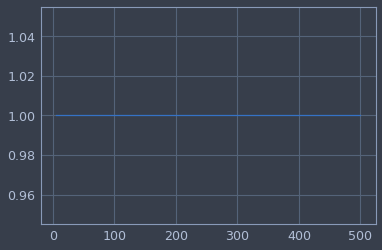

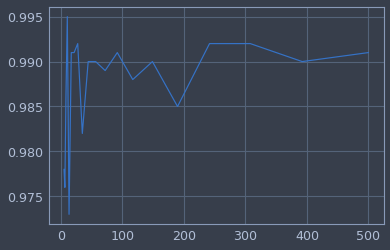

In [18]:
# [Answer to Ex. 3.1.3]

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import train_test_split, validation_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y)

test_accs = []
train_accs = []

def rc_acc(n_estimators):
    clf_rf = RandomForestClassifier(n_estimators = int(n_estimators))
    clf_rf.fit(X_train,y_train)
    testacc = round(roc_auc_score(y_test, clf_rf.predict_proba(X_test)[:, 1]), 3)
    trainacc = round(roc_auc_score(y_train, clf_rf.predict_proba(X_train)[:, 1]), 3)
    
    return trainacc, testacc

nestimators = np.logspace(np.log10(5), np.log10(500), 20)
accs = [rc_acc(n) for n in nestimators]

plt.plot(nestimators, [i[0] for i in accs])
plt.show()


plt.plot(nestimators, [i[1] for i in accs])
plt.show()

Scikit's default of n_estimators = 100 doesn't seems ok in this particular case, although the best accuracy is a bit lower.

Let's do it automatically:

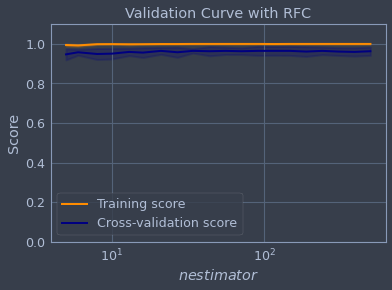

In [16]:
param_range = [int(i) for i in np.logspace(np.log10(5), np.log10(500), 20)]
train_scores, test_scores = validation_curve(
    RandomForestClassifier(), X, y, param_name="n_estimators", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with RFC")
plt.xlabel(r"$nestimator$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

The results are similar, just scaled from 0-1 as a visual convolution.

### Boosting

#### Adapative boosting

Recall that boosting uses not only many independent trees, but leverage trees that learn from one another.

> **Ex. 3.1.4**: Repeat Ex. 3.1.3, but using AdaBoost. Do you notice any performance difference?

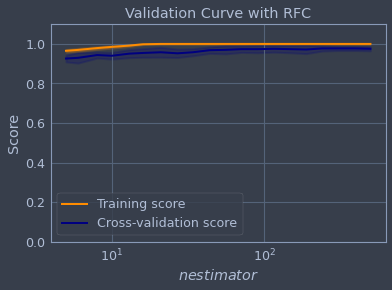

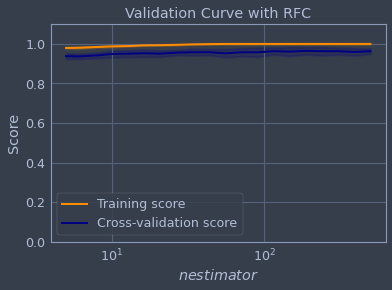

In [19]:
param_range = [int(i) for i in np.logspace(np.log10(5), np.log10(500), 20)]
train_scores, test_scores = validation_curve(
    AdaBoostClassifier(), X, y, param_name="n_estimators", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with RFC")
plt.xlabel(r"$nestimator$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

train_scores, test_scores = validation_curve(
    GradientBoostingClassifier(), X, y, param_name="n_estimators", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with RFC")
plt.xlabel(r"$nestimator$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

At first glance pretty similar, although Random Forests seem to do better at the bottom range from the great art of eye-balling.

#### Gradient boosting
An alternative way of using boosting is gradient boosting. This uses the gradient of the residual of the previous learner to estimate the next learner. 

> **Ex. 3.1.5**: Repeat Ex. 3.1.3, but using `sklearn.ensemble.GradientBoostingClassifier`. Do you notice any performance difference?

# 3.1.5

See above

*Answer comment:*  XGBoost is around as good as random forest.

# Decision tree mechanism

Here you will be manually implementing the decision tree mechanism across a number of connected exercises.

>**Ex. 3.2.1**: Find the best feature to split on. There are many ways to do this, and we will be very practical about this and use the Pearson correlatio coefficient between a feature and the outcome, as an indicator of goodness.
Therefore, write a function that takes your input data `data_features` as input and returns the name of the feature that has the highest absolute (positive or negative) correlation with the outcome.
Use this function on your data to find the best initial feature to split on.
>
> *Hint: You can use `scipy.stats.pearsonr` to compute the correlation coefficient. E.g. to compute the absolute correlation coefficient between two variables `a` and `b`, I would write `abs(pearsonr(a, b)[0])`.*

In [124]:
# [Answer to Ex. 3.2.1]

def pearson_feature(X, y, names):
    abs_corrs = [abs(r[0]) for r in np.corrcoef(np.c_[y, X], rowvar=False)][1:]
    val = abs_corrs.index(max(abs_corrs))
    # print(f"{names[val]}, I choose you!")
    return val, names[val]

optimal_feature = pearson_feature(X_train, y_train, raw_data.feature_names)

>**Ex. 3.2.2**: Read about [Shannon entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory)). Write a function that computes the Shannon-entropy of a probability vector. Compute the Shannon entropy of `p=[0.4, 0.6]`.

In [109]:
# [Answer to Ex. 3.2.2]

def shannon(p):
    if np.any((p <= 0)|(p >= 1 )):
        raise ValueError("p must be a vector of probabilities!")

    return -np.sum(p*np.log2(p))


shannon(np.array([0.4, 0.6]))

0.9709505944546686

>**Ex. 3.2.3**: Compute split entropy. 
1. Write a function `split_data_on(data, feature, thr)` that takes as input your data, initially `df_breast`, a threshold, `thr`, and a feature, `feature`, and then splits the data into two subsets (also `pandas.Dataframe`s), `data0` and `data1`, where samples in `data0` have `data[feature] > thr` and samples in `data1` have `data[feature] > thr`. Use it to split `df_breast` on the 'worst perimeter' feature at 105.9, to create two new variables `data0` and `data1` and print their number of rows.
1. Write another function `outcome_entropy(data)` that computes the entropy of outcomes ('benign' column), given a subset. Print the entropies of `data0` and `data1`.
2. Write a final function `split_entropy(data0, data1)` that uses the previous function to compute the split entropy (i.e. weighted average of both resulting subsets). Compute the split entropy.

In [112]:
# [Answer to Ex. 3.2.3]

def split_data_on(data, feature, thr):
    return data[data[feature] <= thr], data[data[feature] > thr]

def outcome_entropy(data):
    p = data.mean()
    try:
        return shannon(np.array([p, 1-p]))
    except ValueError as ve:
        return 0

def split_entrop(data0, data1):
    n = len(data0)
    m = len(data1)
    return (n * outcome_entropy(data0) + m * outcome_entropy(data1)) / (n + m)

data0, data1 = split_data_on(df_breast, "worst perimeter", 105.9)
print(data0.shape)
print(data1.shape)

tar = "benign"
print(outcome_entropy(data0[tar]))
print(outcome_entropy(data1[tar]))
print(split_entrop(data0[tar], data1[tar]))

(345, 31)
(224, 31)
0.283310737706148
0.5559671540224538
0.3906482372753088


split_entrop should handle more than two

>**Ex. 3.2.4**: Find the optimal split threshold. Write a function called `optimal_threshold(data, feature)`
that takes as input your data and a feature, and loops over all possible splits for a feature such as to find and return the minimum split entropy and associated threshold. Execute it for 'worst perimeter' does this match up with your results from 2.3.2?

In [115]:
# [Answer to Ex. 3.2.4]

def split(data, feature, thr, tar = "benign"):
    d0, d1 = split_data_on(data, feature, thr)
    return split_entrop(d0[tar], d1[tar])


def optimal_treshold(data, feature, n = 100):
    low = data[feature].min()
    high = data[feature].max()
    rng = np.linspace(low, high, num = n)
    entropies = [split(data, feature, r) for r in rng]
    return rng[entropies.index(min(entropies))]


optimal_treshold(df_breast, "worst perimeter")

115.31181818181818

Optimal split is close to the guess above of 105.

>**Ex. 3.2.5**: Now you have (1) a function that finds the best feature to split on, given dataframe of data, and (2) another function that computes the threshold at which to split it into two new subsets. Implement the decision tree mechanism, and print the maximum entropy path.
>1. Implement the following pseudocode and print the output:<br><br>
>Step 0. Initially, set `data = df_breast`.<br>
>Step 1. Find the feature that gives the lowest split entropy for `data` (use `best_feature`). Print the name of the feature.<br>
>Step 2. Split `data` *on the optimal threshold* of that feature, to produce `data0` and `data1` (use `optimal_threshold` to find the optimal threshold and then use `split_data_on` to actually split it). Print the entropy of each, as well as their weighted avg. entropy (i.e. the split entropy).<br>
>Step 3. Overwrite the `data` variable with either `data0` or `data1`, depending on which has the highest entropy.<br>
>Step 4. Stop if there are less than 5 datapoints in `data`. Otherwise start over from 1.<br><br>
>My output looks [like this](https://github.com/abjer/sds_eml_2020/blob/master/material/session_2/solution_2.3.5.2.png) for the first five splits.<br><br>
>
>2. Comment on decision path your code takes: How many splits are there? Does average entropy always decrease? Anything else worth commenting on?


In [134]:
# [Answer to Ex. 3.2.5]

def split_decision_tree(data, target = "benign", minlen = 5):
    while len(data) >= minlen:
        X = data.drop(target, axis = 1)
        y = data[target]
        names = data.columns
        feature = pearson_feature(X, y, names)[1]
        thr = optimal_treshold(data, feature)
        datas = split_data_on(data, feature, thr)
        ents = [outcome_entropy(d[tar]) for d in datas]
        print(ents)
        print(split_entrop(data0[tar], data1[tar]))
        data = datas[ents.index(min(ents))]
        print(len(data))



split_decision_tree(df_breast)

[0.45046896726551316, 0.3227569588973982]
0.3906482372753088
187
[0.2342165085869521, 0]
0.3906482372753088
4


In [117]:
df_breast

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


*Answer comment:*  Our procedure tends to split into a high-entropy chunk and a small-entropy chunk. If the high-entropy chunk were always bigger than
the small entropy chunk, then we would likely see split entropy decrease monotously, but already at split 1 we see
that the small chunk has the highest entropy, and as such we continue splitting on that. Because this happens
we end up having to split a very small chunk of data, and potentially, this is not easily split to the average split
entropy rises again.

>**Ex. 3.2.6**:  Train a `sklearn.tree.DecisionTreeClassifier` classifier on the dataset. Initiate the classifier with `criterion='entropy'`. What are the most important features of this classifier? How does this line up with the order of splits you just printed (a comment is fine)?

In [ ]:
# [Answer to Ex. 3.2.6]

*Answer comment:* The decision tree heavily overweights the importance of the first feature it splits on, but we see it
chooses the same one as we do. For the remainder, there are differences, of course because we only split on the most
entropous subset.

# Neural networks

### A visual inspection of neural networks
Instead of diving into code, it's more important that our intuition about what neural networks are doing is as good as possible. And the best (and most fun) way to do that is to play around and with things a bit, so go familiarize yourself with the [Tensorflow Playground](https://playground.tensorflow.org/), slide some knobs and pull some levers. The example in the lecture uses the same idea for demonstrating the intuition of neural networks.

> **Ex. 3.3.1** Using the dataset with the two well-seperate guassian distributions, create the minimal neural network that seperates the clusters. You can report your answer with a link (the URL on playground.tensorflow.org changes as you update the network, so at any time you can use the link to show others what you have created).


In [71]:
# [Answer to Ex. 3.3.1]

> **Ex. 3.3.2** Using the dataset with the two circular clusters, one inner and one outer. Create the minimal neural network that seperates the clusters. Again, report your answer with a link.

In [71]:
# [Answer to Ex. 3.3.2]

> **Ex. 3.3.3** See if you can create a network that performs well on the the dataset with the intertwined spirals. Again, report your answer with a link. Can you do it with only $x_1$ and $x_2$?

>> *Hint*: try experimenting with depth of the network, regularization and possibly the activation function

In [73]:
# [Answer to Ex. 3.3.3]